# Homework 6

In [2]:
import numpy as np
from numpy import linalg as LA
from sklearn.decomposition import PCA

1.  Compute the covariance matrix of:
    $\mathbf{X}=\left[\begin{array}{ccc}4.0 & 2.0 & 0.60 \\ 4.2 & 2.1 & 0.59 \\ 3.9 & 2.0 & 0.58 \\ 4.3 & 2.1 & 0.62 \\ 4.1 & 2.2 & 0.63\end{array}\right]$<br><br>

In [25]:
#np matrix is flipped, must transpose .T them
np.set_printoptions(precision = 3)

#d = np.array([[4.0,2.0,0.60],[4.2,2.1,0.59],[3.9,2.0,0.58],[4.3,2.1,0.62],[4.1,2.2,0.63]])
d = np.array([4.0,2.0,0.60,4.2,2.1,0.59,3.9,2.0,0.58,4.3,2.1,0.62,4.1,2.2,0.63]).reshape(5,3)
print(f'matx is \n{d}')

cv = np.cov(d,rowvar=True)
print(f'Cov matx is \n{cv}')

matx is 
[[4.   2.   0.6 ]
 [4.2  2.1  0.59]
 [3.9  2.   0.58]
 [4.3  2.1  0.62]
 [4.1  2.2  0.63]]
Cov matx is 
[[2.92  3.098 2.846 3.164 2.966]
 [3.098 3.287 3.02  3.357 3.148]
 [2.846 3.02  2.775 3.083 2.893]
 [3.164 3.357 3.083 3.429 3.212]
 [2.966 3.148 2.893 3.212 3.019]]


2.  Using the PCA Tree Example above, calculate and display the first 1st, 3rd, and 10th dimensions/components of the image.  Discuss the differences.

In [16]:
#  PCA Tree Example
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import numpy as np
import warnings
from PIL import Image
from urllib.request import urlopen

warnings.filterwarnings("ignore", category=RuntimeWarning)

<ipython-input-17-28492cc476e6>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url, mode='F')


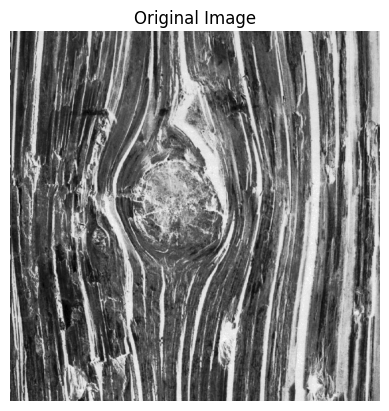

In [17]:
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture_6_7_8_9/D72.png'
amg = imageio.imread(url, mode='F')

cv = np.cov(amg.transpose())
evl, evc = np.linalg.eig(cv)
ndata = np.dot(amg, evc[:,:2])

plt.title('Original Image')
plt.axis('off')
plt.imshow(amg, cmap='gray')
plt.show()

def ScrambleImage(mgdata):
    sdata = mgdata + 0
    np.random.shuffle(sdata)
    dists = np.sqrt(((mgdata[0]-sdata).sum(1)))
    seedrow = (dists==0).nonzero()[0]
    return sdata, seedrow

def Project(data):
    """data in rows returns matrix: projected data in rows"""
    cv = np.cov(data.transpose())
    evl, evc = np.linalg.eig(cv)
    ndata = np.dot(data, evc)
    return ndata

sdata, seedrow = ScrambleImage(amg)
ndata = Project(sdata)

"""
plt.title('Scrambled Image')
plt.axis('off')
plt.imshow(ndata, cmap='gray')
plt.show()
"""

def Unscramble(sdata, seedrow, ndata):
    V,H = sdata.shape
    udata = np.zeros((V,H))
    udata[0] = sdata[seedrow] + 0
    unused = list(range(V))
    unused.remove(seedrow)
    nndata = ndata + 0
    k = seedrow
    for i in range( 1, V ):
        dist = np.sqrt(((nndata[k]-nndata[unused])**2).sum(1))
        ag = dist.argsort()
        k = unused[ag[0]]
        udata[i] = sdata[k]
        unused.remove( k )
    return udata

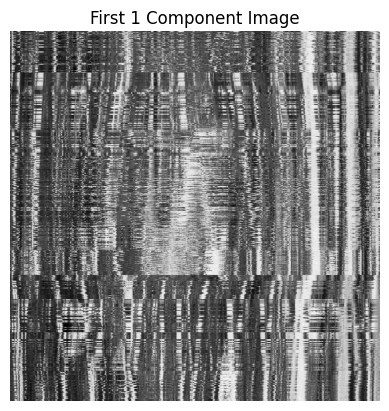

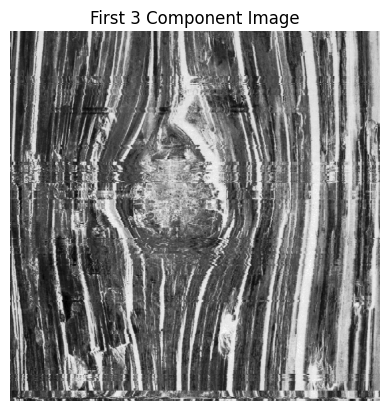

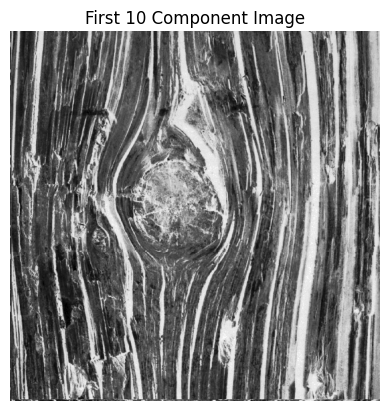

In [18]:
#Q2

dims = [1,3,10]
for i in range(len(dims)):
  udata = Unscramble(sdata, seedrow, ndata[:,:int(dims[i])])

  plt.title(f'First {dims[i]} Component Image')
  plt.axis('off')
  plt.imshow(udata, cmap='gray')
  plt.show()

Q2 Discuss the differences.

It seems as the number of dimensions of the image increases from 1 to 3, the clarity significantly improves. Then, from 3 to 7 there is another jump in clarity, but the gains reach a point of margnial returns from 7 to 10 dimensions.

3.  List the names of the faces used.

In [19]:
from sklearn.datasets import fetch_lfw_people

In [20]:
#Q3
'''
Using the Eigen Face example, set the min_faces_per_person=55
'''
faces = fetch_lfw_people(min_faces_per_person=55)
print('\nFaces to be used:\n', faces.target_names)
print('\nNum of faces to be used:\n', len(faces.target_names))
print('\nFaces shape:', faces.images.shape)


Faces to be used:
 ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jean Chretien' 'Junichiro Koizumi'
 'Tony Blair']

Num of faces to be used:
 9

Faces shape: (1403, 62, 47)


4.  Show the subplots for each face of the first 3 principle components using 100 dimensions.

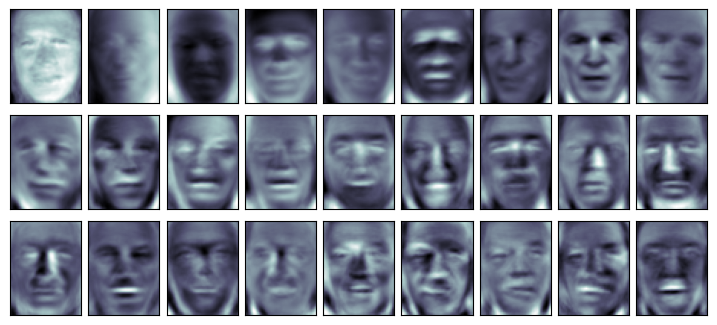

In [21]:
#Q4

from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(n_components=100)
pca.fit(faces.data)

fig, axes = plt.subplots(3, 9, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

5.  Show the final plot of the faces for the first 100 dimensions.

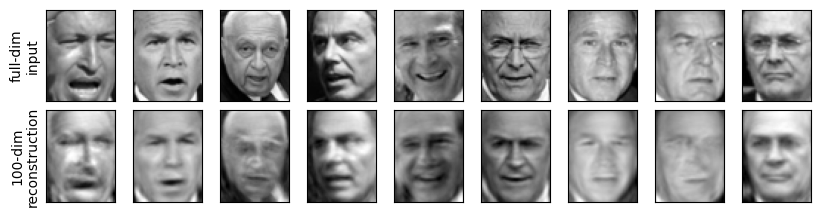

In [22]:
#Q5 Show the final plot of the faces for the first 100 dimensions.

'''plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()'''

# Compute the components and projected faces
pca = RandomizedPCA(100).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

# Plot the results
fig, ax = plt.subplots(2, 9, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(9):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction');